In [2]:
## Importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
## Reading the data
df = pd.read_excel('CA Project Dataset.xlsx')

In [24]:
## Data Head
df.head()

,TRAVEL_AGENCY,CATEGORY,PNR,DEPARTURE_DATE,TKT_ISSUE_DATE,ORIGIN,DESTINATION,TICKET_DESIGNATOR_CODE,CABIN,REVENUE,UNIQUE_CUSTOMERS,DIFFERENCE
0,Company 000018,LEISURE,D4R4D7,2018-01-01,2017-10-23,MSP,PUW,none,Y,498.62,2,70
1,Company 000018,LEISURE,MV8BSJ,2018-01-01,2017-07-21,IAD,SFO,none,Y,740.06,2,164
2,Company 000018,LEISURE,ZRD3ZG,2018-01-01,2017-09-29,JFK,SFO,none,Y,231.63,1,94
3,Company 000040,BUSINESS,KZYROQ,2018-01-01,2017-12-16,SFO,DTW,none,Y,266.98,1,16
4,Company 000040,BUSINESS,SULHSY,2018-01-01,2017-12-07,PHL,MSY,none,Y,241.86,1,25


In [5]:
df.describe()

,REVENUE,UNIQUE_CUSTOMERS
count,211530.000000,211530.000000
mean,219.827875,1.290621
std,242.249153,0.788100
min,-123.020000,1.000000
25%,106.050000,1.000000
50%,162.330000,1.000000
75%,254.880000,1.000000
max,25810.000000,38.000000


TRAVEL_AGENCY             0
CATEGORY                  0
PNR                       4
DEPARTURE_DATE            0
TKT_ISSUE_DATE            0
ORIGIN                    0
DESTINATION               0
TICKET_DESIGNATOR_CODE    1
CABIN                     9
REVENUE                   0
UNIQUE_CUSTOMERS          0
dtype: int64

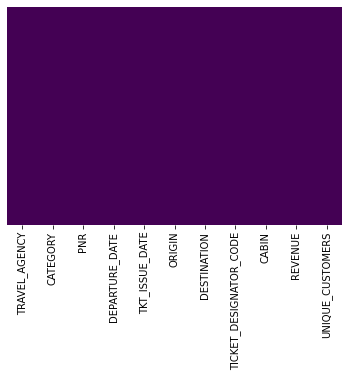

In [6]:
## Plotting null values
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')
df.isnull().sum()

TRAVEL_AGENCY             0
CATEGORY                  0
PNR                       0
DEPARTURE_DATE            0
TKT_ISSUE_DATE            0
ORIGIN                    0
DESTINATION               0
TICKET_DESIGNATOR_CODE    0
CABIN                     0
REVENUE                   0
UNIQUE_CUSTOMERS          0
dtype: int64

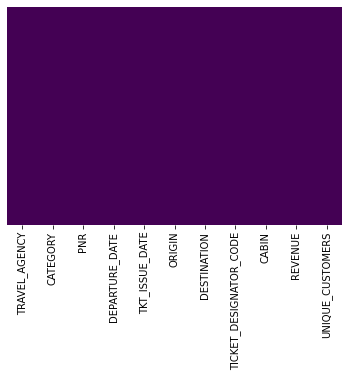

In [7]:
## Removing Null Values because it's very negligible.
df.dropna(inplace=True)
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')
df.isnull().sum()

<AxesSubplot:xlabel='CATEGORY', ylabel='count'>

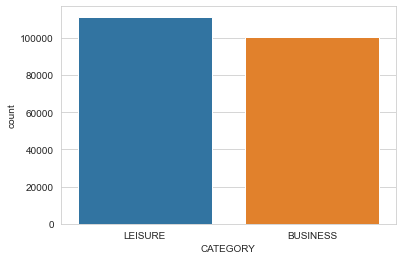

In [8]:
# Count plot for Category
sns.set_style('whitegrid')
sns.countplot(x='CATEGORY',data=df)

In [29]:
## Creating Date Difference Column for understanding the Category.
df['DIFFERENCE'] = (df['DEPARTURE_DATE'] - df['TKT_ISSUE_DATE']).dt.days
df.head(1000)

,TRAVEL_AGENCY,CATEGORY,PNR,DEPARTURE_DATE,TKT_ISSUE_DATE,ORIGIN,DESTINATION,TICKET_DESIGNATOR_CODE,CABIN,REVENUE,UNIQUE_CUSTOMERS,DIFFERENCE,Coupon_Applied
0,Company 000018,LEISURE,D4R4D7,2018-01-01,2017-10-23,MSP,PUW,none,Y,498.62,2,70,False
1,Company 000018,LEISURE,MV8BSJ,2018-01-01,2017-07-21,IAD,SFO,none,Y,740.06,2,164,False
2,Company 000018,LEISURE,ZRD3ZG,2018-01-01,2017-09-29,JFK,SFO,none,Y,231.63,1,94,False
3,Company 000040,BUSINESS,KZYROQ,2018-01-01,2017-12-16,SFO,DTW,none,Y,266.98,1,16,False
4,Company 000040,BUSINESS,SULHSY,2018-01-01,2017-12-07,PHL,MSY,none,Y,241.86,1,25,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,Company 001356,BUSINESS,DKUUUK,2018-01-01,2017-11-20,SFO,LGA,CS72,Y,134.33,1,42,True
996,Company 001356,BUSINESS,8GH6BJ,2018-01-01,2017-10-25,SFO,LGA,none,Y,104.21,1,68,False
997,Company 001356,BUSINESS,93PYU2,2018-01-01,2017-11-16,SFO,LGA,CS72,Y,402.99,3,46,True
998,Company 001356,BUSINESS,FBDQ9T,2018-01-01,2017-12-04,SJO,LGA,none,Y,403.00,1,28,False


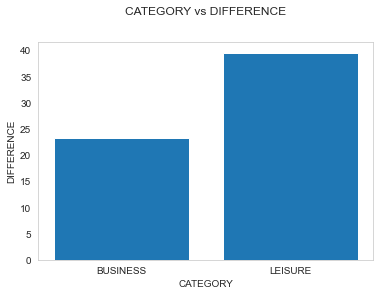

In [16]:
## Plotting CATEGORY VS DIFFERENCE 
result = df.groupby('CATEGORY').mean()
plt.bar(result.index, result['DIFFERENCE'])
plt.xlabel('CATEGORY')
plt.ylabel('DIFFERENCE')
plt.title('CATEGORY vs DIFFERENCE', y=1.1)
plt.grid()
plt.show()

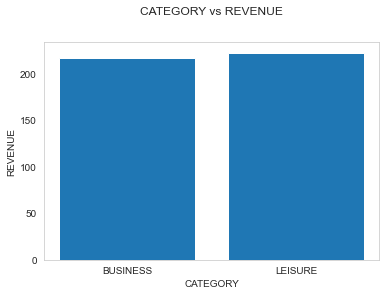

In [17]:
## Plotting CATEGORY VS REVENUE 
result = df.groupby('CATEGORY').mean()
plt.bar(result.index, result['REVENUE'])
plt.xlabel('CATEGORY')
plt.ylabel('REVENUE')
plt.title('CATEGORY vs REVENUE', y=1.1)
plt.grid()
plt.show()

In [26]:
#replace coupon code with applied or not
df['Coupon_Applied'] = True
x = -1
for i in df.TICKET_DESIGNATOR_CODE:
    x += 1
    if i == 'none':
        df.Coupon_Applied[x] = False 

/var/folders/95/1s658jrj3px0n2x1nj0txcvc0000gn/T/ipykernel_33691/1208801089.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.Coupon_Applied[x] = False


In [106]:
## creating new data(Jan-Feb) for the model.
new_df = df[(df['DEPARTURE_DATE'] >= '2018-01-01') & (df['DEPARTURE_DATE'] < '2018-03-01')]

In [107]:
new_df.tail()

,TRAVEL_AGENCY,CATEGORY,PNR,DEPARTURE_DATE,TKT_ISSUE_DATE,ORIGIN,DESTINATION,TICKET_DESIGNATOR_CODE,CABIN,REVENUE,UNIQUE_CUSTOMERS,DIFFERENCE,Coupon_Applied
97702,Company 002608,LEISURE,ZFPXAE,2018-02-28,2017-12-17,YYJ,SFO,none,Y,78.00,1,73,True
97703,Company 002625,BUSINESS,CAM17O,2018-02-28,2018-02-28,BIL,ATL,CA29,Y,241.12,1,0,True
97704,Company 002625,BUSINESS,VRWPBN,2018-02-28,2018-02-26,PSC,ATL,none,Y,323.20,1,2,False
97705,Company 002625,BUSINESS,HHA18X,2018-02-28,2018-02-25,ATL,BIL,CA29,Y,187.54,1,3,False
97706,Company 002627,LEISURE,9B7N8I,2018-02-28,2018-02-22,PHL,SIT,none,F,324.00,1,6,True


In [91]:
new_df.dtypes


TRAVEL_AGENCY                     object
CATEGORY                          object
PNR                               object
DEPARTURE_DATE            datetime64[ns]
TKT_ISSUE_DATE            datetime64[ns]
ORIGIN                            object
DESTINATION                       object
TICKET_DESIGNATOR_CODE            object
CABIN                             object
REVENUE                          float64
UNIQUE_CUSTOMERS                   int64
DIFFERENCE                         int64
Coupon_Applied                      bool
dtype: object

In [112]:
## Creating dummy variables for the model.
df_dummies = pd.get_dummies(new_df, columns=['CABIN'])

In [113]:
df_dummies.tail()

,TRAVEL_AGENCY,CATEGORY,PNR,DEPARTURE_DATE,TKT_ISSUE_DATE,ORIGIN,DESTINATION,TICKET_DESIGNATOR_CODE,REVENUE,UNIQUE_CUSTOMERS,DIFFERENCE,Coupon_Applied,CABIN_F,CABIN_Y
97702,Company 002608,LEISURE,ZFPXAE,2018-02-28,2017-12-17,YYJ,SFO,none,78.00,1,73,True,0,1
97703,Company 002625,BUSINESS,CAM17O,2018-02-28,2018-02-28,BIL,ATL,CA29,241.12,1,0,True,0,1
97704,Company 002625,BUSINESS,VRWPBN,2018-02-28,2018-02-26,PSC,ATL,none,323.20,1,2,False,0,1
97705,Company 002625,BUSINESS,HHA18X,2018-02-28,2018-02-25,ATL,BIL,CA29,187.54,1,3,False,0,1
97706,Company 002627,LEISURE,9B7N8I,2018-02-28,2018-02-22,PHL,SIT,none,324.00,1,6,True,1,0


In [181]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df_dummies[[ 'DIFFERENCE', 'Coupon_Applied', 'CABIN_F','CABIN_Y' ]],df_dummies.CATEGORY,train_size=0.8)

In [182]:
X_test


,DIFFERENCE,Coupon_Applied,CABIN_F,CABIN_Y
37811,31,False,0,1
49492,56,False,0,1
38718,1,True,1,0
53296,28,False,0,1
30222,8,False,0,1
...,...,...,...,...
13647,0,False,0,1
5060,59,False,0,1
35796,8,False,0,1
47248,25,False,0,1


In [183]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [184]:
model.fit(X_train, y_train)

LogisticRegression()

In [185]:
X_test


,DIFFERENCE,Coupon_Applied,CABIN_F,CABIN_Y
37811,31,False,0,1
49492,56,False,0,1
38718,1,True,1,0
53296,28,False,0,1
30222,8,False,0,1
...,...,...,...,...
13647,0,False,0,1
5060,59,False,0,1
35796,8,False,0,1
47248,25,False,0,1


In [186]:
y_predicted = model.predict(X_test)


In [187]:
model.predict_proba(X_test)


array([[0.37647043, 0.62352957],
       [0.29336755, 0.70663245],
       [0.94510192, 0.05489808],
       ...,
       [0.46008731, 0.53991269],
       [0.39779287, 0.60220713],
       [0.40138708, 0.59861292]])

In [188]:
model.score(X_test,y_test)


0.6757932446264073

In [122]:
y_predicted


array(['LEISURE', 'BUSINESS', 'LEISURE', ..., 'LEISURE', 'LEISURE',
       'LEISURE'], dtype=object)

In [123]:
X_test


,REVENUE,DIFFERENCE,Coupon_Applied,CABIN_F,CABIN_Y
80318,124.65,11,False,0,1
6210,70.00,21,True,0,1
65596,347.00,10,False,0,1
9074,88.37,97,False,0,1
15778,168.98,9,True,0,1
...,...,...,...,...,...
88826,121.86,30,False,0,1
47046,155.20,7,True,0,1
90952,222.02,19,False,0,1
33196,83.72,55,False,0,1


In [125]:
model2 = new_df

In [126]:
from datetime import date
import calendar
model2['Day'] = 1
x = -1
for day in model2.DEPARTURE_DATE:
    x += 1
    model2.Day[x] = calendar.day_name[day.weekday()]  

/var/folders/95/1s658jrj3px0n2x1nj0txcvc0000gn/T/ipykernel_33691/780310940.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model2['Day'] = 1
/var/folders/95/1s658jrj3px0n2x1nj0txcvc0000gn/T/ipykernel_33691/780310940.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model2.Day[x] = calendar.day_name[day.weekday()]
/Users/priyanshusingh/opt/anaconda3/lib/python3.9/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.or

In [127]:
model2.head()

,TRAVEL_AGENCY,CATEGORY,PNR,DEPARTURE_DATE,TKT_ISSUE_DATE,ORIGIN,DESTINATION,TICKET_DESIGNATOR_CODE,CABIN,REVENUE,UNIQUE_CUSTOMERS,DIFFERENCE,Coupon_Applied,Day
0,Company 000018,LEISURE,D4R4D7,2018-01-01,2017-10-23,MSP,PUW,none,Y,498.62,2,70,False,Monday
1,Company 000018,LEISURE,MV8BSJ,2018-01-01,2017-07-21,IAD,SFO,none,Y,740.06,2,164,False,Monday
2,Company 000018,LEISURE,ZRD3ZG,2018-01-01,2017-09-29,JFK,SFO,none,Y,231.63,1,94,False,Monday
3,Company 000040,BUSINESS,KZYROQ,2018-01-01,2017-12-16,SFO,DTW,none,Y,266.98,1,16,False,Monday
4,Company 000040,BUSINESS,SULHSY,2018-01-01,2017-12-07,PHL,MSY,none,Y,241.86,1,25,False,Monday


In [133]:
model2.count(0)

TRAVEL_AGENCY             97691
CATEGORY                  97691
PNR                       97691
DEPARTURE_DATE            97691
TKT_ISSUE_DATE            97691
ORIGIN                    97691
DESTINATION               97691
TICKET_DESIGNATOR_CODE    97691
CABIN                     97691
REVENUE                   97691
UNIQUE_CUSTOMERS          97691
DIFFERENCE                97691
Coupon_Applied            97691
Day                       97691
dtype: int64

In [132]:
# Dropping unchanged column
x = -1
for i in model2.Day:
    x+=1
    if i == 1:
        model2.drop(index=x, inplace = True)

/Users/priyanshusingh/opt/anaconda3/lib/python3.9/site-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [134]:
model2.count(0)

TRAVEL_AGENCY             97691
CATEGORY                  97691
PNR                       97691
DEPARTURE_DATE            97691
TKT_ISSUE_DATE            97691
ORIGIN                    97691
DESTINATION               97691
TICKET_DESIGNATOR_CODE    97691
CABIN                     97691
REVENUE                   97691
UNIQUE_CUSTOMERS          97691
DIFFERENCE                97691
Coupon_Applied            97691
Day                       97691
dtype: int64

In [135]:
model2_dummies = pd.get_dummies(model2, columns=['CABIN','Day'])

In [140]:
model2_dummies.tail()

,TRAVEL_AGENCY,CATEGORY,PNR,DEPARTURE_DATE,TKT_ISSUE_DATE,ORIGIN,DESTINATION,TICKET_DESIGNATOR_CODE,REVENUE,UNIQUE_CUSTOMERS,...,CABIN_F,CABIN_Y,Day_1,Day_Friday,Day_Monday,Day_Saturday,Day_Sunday,Day_Thursday,Day_Tuesday,Day_Wednesday
97702,Company 002608,LEISURE,ZFPXAE,2018-02-28,2017-12-17,YYJ,SFO,none,78.00,1,...,0,1,1,0,0,0,0,0,0,0
97703,Company 002625,BUSINESS,CAM17O,2018-02-28,2018-02-28,BIL,ATL,CA29,241.12,1,...,0,1,1,0,0,0,0,0,0,0
97704,Company 002625,BUSINESS,VRWPBN,2018-02-28,2018-02-26,PSC,ATL,none,323.20,1,...,0,1,1,0,0,0,0,0,0,0
97705,Company 002625,BUSINESS,HHA18X,2018-02-28,2018-02-25,ATL,BIL,CA29,187.54,1,...,0,1,1,0,0,0,0,0,0,0
97706,Company 002627,LEISURE,9B7N8I,2018-02-28,2018-02-22,PHL,SIT,none,324.00,1,...,1,0,1,0,0,0,0,0,0,0


In [137]:
model2_dummies.count()

TRAVEL_AGENCY             97691
CATEGORY                  97691
PNR                       97691
DEPARTURE_DATE            97691
TKT_ISSUE_DATE            97691
ORIGIN                    97691
DESTINATION               97691
TICKET_DESIGNATOR_CODE    97691
REVENUE                   97691
UNIQUE_CUSTOMERS          97691
DIFFERENCE                97691
Coupon_Applied            97691
CABIN_F                   97691
CABIN_Y                   97691
Day_1                     97691
Day_Friday                97691
Day_Monday                97691
Day_Saturday              97691
Day_Sunday                97691
Day_Thursday              97691
Day_Tuesday               97691
Day_Wednesday             97691
dtype: int64

In [141]:
# Dropping unchanged column
x = -1
for i in model2_dummies.Day_1:
    x+=1
    if i == 1:
        model2_dummies.drop(index=x, inplace = True)

In [142]:
model2_dummies.count()

TRAVEL_AGENCY             97683
CATEGORY                  97683
PNR                       97683
DEPARTURE_DATE            97683
TKT_ISSUE_DATE            97683
ORIGIN                    97683
DESTINATION               97683
TICKET_DESIGNATOR_CODE    97683
REVENUE                   97683
UNIQUE_CUSTOMERS          97683
DIFFERENCE                97683
Coupon_Applied            97683
CABIN_F                   97683
CABIN_Y                   97683
Day_1                     97683
Day_Friday                97683
Day_Monday                97683
Day_Saturday              97683
Day_Sunday                97683
Day_Thursday              97683
Day_Tuesday               97683
Day_Wednesday             97683
dtype: int64

In [189]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(model2_dummies[[ 'UNIQUE_CUSTOMERS','DIFFERENCE', 'Coupon_Applied', 'CABIN_F','CABIN_Y','Day_Friday', 'Day_Monday', 'Day_Saturday','Day_Sunday', 'Day_Thursday', 'Day_Tuesday', 'Day_Wednesday' ]],model2_dummies.CATEGORY,train_size=0.8)

In [190]:
X_test


,UNIQUE_CUSTOMERS,DIFFERENCE,Coupon_Applied,CABIN_F,CABIN_Y,Day_Friday,Day_Monday,Day_Saturday,Day_Sunday,Day_Thursday,Day_Tuesday,Day_Wednesday
32922,1,67,False,0,1,0,0,0,1,0,0,0
42970,1,95,False,0,1,0,0,1,0,0,0,0
26912,1,9,False,0,1,0,0,0,0,0,0,1
24235,2,4,True,0,1,0,0,0,0,0,1,0
58936,1,12,True,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
66981,1,49,False,0,1,0,0,1,0,0,0,0
68074,1,47,False,0,1,0,0,0,1,0,0,0
13683,1,42,True,0,1,0,0,0,0,0,0,1
30318,5,192,False,0,1,1,0,0,0,0,0,0


In [191]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [192]:
model.fit(X_train, y_train)


LogisticRegression()

In [193]:
X_test


,UNIQUE_CUSTOMERS,DIFFERENCE,Coupon_Applied,CABIN_F,CABIN_Y,Day_Friday,Day_Monday,Day_Saturday,Day_Sunday,Day_Thursday,Day_Tuesday,Day_Wednesday
32922,1,67,False,0,1,0,0,0,1,0,0,0
42970,1,95,False,0,1,0,0,1,0,0,0,0
26912,1,9,False,0,1,0,0,0,0,0,0,1
24235,2,4,True,0,1,0,0,0,0,0,1,0
58936,1,12,True,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
66981,1,49,False,0,1,0,0,1,0,0,0,0
68074,1,47,False,0,1,0,0,0,1,0,0,0
13683,1,42,True,0,1,0,0,0,0,0,0,1
30318,5,192,False,0,1,1,0,0,0,0,0,0


In [194]:
y_predicted = model.predict(X_test)


In [195]:
model.predict_proba(X_test)


array([[0.27645197, 0.72354803],
       [0.17657682, 0.82342318],
       [0.51101757, 0.48898243],
       ...,
       [0.86767794, 0.13232206],
       [0.00424885, 0.99575115],
       [0.27424236, 0.72575764]])

In [196]:
model.score(X_test,y_test)


0.6985207554895838

In [171]:
list(model2_dummies)


['TRAVEL_AGENCY',
 'CATEGORY',
 'PNR',
 'DEPARTURE_DATE',
 'TKT_ISSUE_DATE',
 'ORIGIN',
 'DESTINATION',
 'TICKET_DESIGNATOR_CODE',
 'REVENUE',
 'UNIQUE_CUSTOMERS',
 'DIFFERENCE',
 'Coupon_Applied',
 'CABIN_F',
 'CABIN_Y',
 'Day_1',
 'Day_Friday',
 'Day_Monday',
 'Day_Saturday',
 'Day_Sunday',
 'Day_Thursday',
 'Day_Tuesday',
 'Day_Wednesday']

In [172]:
## Model 3
model3 = model2

In [211]:
model3_dummies = pd.get_dummies(model3, columns=['CABIN','Day','DESTINATION','ORIGIN'])

In [212]:
model3_dummies.head()

,TRAVEL_AGENCY,CATEGORY,PNR,DEPARTURE_DATE,TKT_ISSUE_DATE,TICKET_DESIGNATOR_CODE,REVENUE,UNIQUE_CUSTOMERS,DIFFERENCE,Coupon_Applied,...,ORIGIN_WRG,ORIGIN_YAK,ORIGIN_YEG,ORIGIN_YKM,ORIGIN_YLW,ORIGIN_YVR,ORIGIN_YYC,ORIGIN_YYJ,ORIGIN_ZIH,ORIGIN_ZLO
0,Company 000018,LEISURE,D4R4D7,2018-01-01,2017-10-23,none,498.62,2,70,False,...,0,0,0,0,0,0,0,0,0,0
1,Company 000018,LEISURE,MV8BSJ,2018-01-01,2017-07-21,none,740.06,2,164,False,...,0,0,0,0,0,0,0,0,0,0
2,Company 000018,LEISURE,ZRD3ZG,2018-01-01,2017-09-29,none,231.63,1,94,False,...,0,0,0,0,0,0,0,0,0,0
3,Company 000040,BUSINESS,KZYROQ,2018-01-01,2017-12-16,none,266.98,1,16,False,...,0,0,0,0,0,0,0,0,0,0
4,Company 000040,BUSINESS,SULHSY,2018-01-01,2017-12-07,none,241.86,1,25,False,...,0,0,0,0,0,0,0,0,0,0


In [213]:
list(model3_dummies)



['TRAVEL_AGENCY',
 'CATEGORY',
 'PNR',
 'DEPARTURE_DATE',
 'TKT_ISSUE_DATE',
 'TICKET_DESIGNATOR_CODE',
 'REVENUE',
 'UNIQUE_CUSTOMERS',
 'DIFFERENCE',
 'Coupon_Applied',
 'CABIN_F',
 'CABIN_Y',
 'Day_1',
 'Day_Friday',
 'Day_Monday',
 'Day_Saturday',
 'Day_Sunday',
 'Day_Thursday',
 'Day_Tuesday',
 'Day_Wednesday',
 'DESTINATION_ABQ',
 'DESTINATION_ADK',
 'DESTINATION_ADQ',
 'DESTINATION_ALW',
 'DESTINATION_ANC',
 'DESTINATION_ATL',
 'DESTINATION_AUS',
 'DESTINATION_BET',
 'DESTINATION_BIL',
 'DESTINATION_BLI',
 'DESTINATION_BNA',
 'DESTINATION_BOI',
 'DESTINATION_BOS',
 'DESTINATION_BRW',
 'DESTINATION_BUR',
 'DESTINATION_BWI',
 'DESTINATION_BZN',
 'DESTINATION_CDV',
 'DESTINATION_CHS',
 'DESTINATION_CUN',
 'DESTINATION_DAL',
 'DESTINATION_DCA',
 'DESTINATION_DEN',
 'DESTINATION_DFW',
 'DESTINATION_DTW',
 'DESTINATION_DUT',
 'DESTINATION_EAT',
 'DESTINATION_EUG',
 'DESTINATION_EWR',
 'DESTINATION_FAI',
 'DESTINATION_FAT',
 'DESTINATION_FCA',
 'DESTINATION_FLL',
 'DESTINATION_GDL',
 '

In [214]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(model3_dummies[[ 'UNIQUE_CUSTOMERS','DIFFERENCE', 'Coupon_Applied', 'CABIN_F','CABIN_Y','Day_Friday', 'Day_Monday', 'Day_Saturday','Day_Sunday', 'Day_Thursday', 'Day_Tuesday', 'Day_Wednesday' ,'DESTINATION_ABQ',
 'DESTINATION_ADK',
 'DESTINATION_ADQ',
 'DESTINATION_ALW',
 'DESTINATION_ANC',
 'DESTINATION_ATL',
 'DESTINATION_AUS',
 'DESTINATION_BET',
 'DESTINATION_BIL',
 'DESTINATION_BLI',
 'DESTINATION_BNA',
 'DESTINATION_BOI',
 'DESTINATION_BOS',
 'DESTINATION_BRW',
 'DESTINATION_BUR',
 'DESTINATION_BWI',
 'DESTINATION_BZN',
 'DESTINATION_CDV',
 'DESTINATION_CHS',
 'DESTINATION_CUN',
 'DESTINATION_DAL',
 'DESTINATION_DCA',
 'DESTINATION_DEN',
 'DESTINATION_DFW',
 'DESTINATION_DTW',
 'DESTINATION_DUT',
 'DESTINATION_EAT',
 'DESTINATION_EUG',
 'DESTINATION_EWR',
 'DESTINATION_FAI',
 'DESTINATION_FAT',
 'DESTINATION_FCA',
 'DESTINATION_FLL',
 'DESTINATION_GDL',
 'DESTINATION_GEG',
 'DESTINATION_GTF',
 'DESTINATION_HAV',
 'DESTINATION_HDN',
 'DESTINATION_HLN',
 'DESTINATION_HNL',
 'DESTINATION_IAD',
 'DESTINATION_IAH',
 'DESTINATION_ICT',
 'DESTINATION_IND',
 'DESTINATION_JFK',
 'DESTINATION_JNU',
 'DESTINATION_KOA',
 'DESTINATION_KTN',
 'DESTINATION_LAS',
 'DESTINATION_LAX',
 'DESTINATION_LGA',
 'DESTINATION_LIH',
 'DESTINATION_LIR',
 'DESTINATION_LTO',
 'DESTINATION_LWS',
 'DESTINATION_MCI',
 'DESTINATION_MCO',
 'DESTINATION_MEX',
 'DESTINATION_MFR',
 'DESTINATION_MKE',
 'DESTINATION_MMH',
 'DESTINATION_MRY',
 'DESTINATION_MSO',
 'DESTINATION_MSP',
 'DESTINATION_MSY',
 'DESTINATION_MZT',
 'DESTINATION_OAK',
 'DESTINATION_OGG',
 'DESTINATION_OKC',
 'DESTINATION_OMA',
 'DESTINATION_OME',
 'DESTINATION_ONT',
 'DESTINATION_ORD',
 'DESTINATION_OTZ',
 'DESTINATION_PDX',
 'DESTINATION_PHL',
 'DESTINATION_PHX',
 'DESTINATION_PSC',
 'DESTINATION_PSG',
 'DESTINATION_PSP',
 'DESTINATION_PUW',
 'DESTINATION_PVR',
 'DESTINATION_RDM',
 'DESTINATION_RDU',
 'DESTINATION_RNO',
 'DESTINATION_SAN',
 'DESTINATION_SAT',
 'DESTINATION_SBA',
 'DESTINATION_SBP',
 'DESTINATION_SCC',
 'DESTINATION_SEA',
 'DESTINATION_SFO',
 'DESTINATION_SIT',
 'DESTINATION_SJC',
 'DESTINATION_SJD',
 'DESTINATION_SJO',
 'DESTINATION_SLC',
 'DESTINATION_SMF',
 'DESTINATION_SNA',
 'DESTINATION_STL',
 'DESTINATION_STS',
 'DESTINATION_SUN',
 'DESTINATION_TPA',
 'DESTINATION_TUS',
 'DESTINATION_WRG',
 'DESTINATION_YAK',
 'DESTINATION_YEG',
 'DESTINATION_YKM',
 'DESTINATION_YLW',
 'DESTINATION_YVR',
 'DESTINATION_YYC',
 'DESTINATION_YYJ',
 'DESTINATION_ZIH',
 'DESTINATION_ZLO','ORIGIN_ABQ',
 'ORIGIN_ADK',
 'ORIGIN_ADQ',
 'ORIGIN_ALW',
 'ORIGIN_ANC',
 'ORIGIN_ATL',
 'ORIGIN_AUS',
 'ORIGIN_BET',
 'ORIGIN_BIL',
 'ORIGIN_BLI',
 'ORIGIN_BNA',
 'ORIGIN_BOI',
 'ORIGIN_BOS',
 'ORIGIN_BRW',
 'ORIGIN_BUR',
 'ORIGIN_BWI',
 'ORIGIN_BZN',
 'ORIGIN_CDV',
 'ORIGIN_CHS',
 'ORIGIN_CUN',
 'ORIGIN_DAL',
 'ORIGIN_DCA',
 'ORIGIN_DEN',
 'ORIGIN_DFW',
 'ORIGIN_DTW',
 'ORIGIN_DUT',
 'ORIGIN_EAT',
 'ORIGIN_EUG',
 'ORIGIN_EWR',
 'ORIGIN_FAI',
 'ORIGIN_FAT',
 'ORIGIN_FCA',
 'ORIGIN_FLL',
 'ORIGIN_GDL',
 'ORIGIN_GEG',
 'ORIGIN_GTF',
 'ORIGIN_HAV',
 'ORIGIN_HDN',
 'ORIGIN_HLN',
 'ORIGIN_HNL',
 'ORIGIN_IAD',
 'ORIGIN_IAH',
 'ORIGIN_ICT',
 'ORIGIN_IND',
 'ORIGIN_JFK',
 'ORIGIN_JNU',
 'ORIGIN_KOA',
 'ORIGIN_KTN',
 'ORIGIN_LAS',
 'ORIGIN_LAX',
 'ORIGIN_LGA',
 'ORIGIN_LIH',
 'ORIGIN_LIR',
 'ORIGIN_LTO',
 'ORIGIN_LWS',
 'ORIGIN_MCI',
 'ORIGIN_MCO',
 'ORIGIN_MEX',
 'ORIGIN_MFR',
 'ORIGIN_MKE',
 'ORIGIN_MMH',
 'ORIGIN_MRY',
 'ORIGIN_MSO',
 'ORIGIN_MSP',
 'ORIGIN_MSY',
 'ORIGIN_MZT',
 'ORIGIN_OAK',
 'ORIGIN_OGG',
 'ORIGIN_OKC',
 'ORIGIN_OMA',
 'ORIGIN_OME',
 'ORIGIN_ONT',
 'ORIGIN_ORD',
 'ORIGIN_OTZ',
 'ORIGIN_PDX',
 'ORIGIN_PHL',
 'ORIGIN_PHX',
 'ORIGIN_PSC',
 'ORIGIN_PSG',
 'ORIGIN_PSP',
 'ORIGIN_PUW',
 'ORIGIN_PVR',
 'ORIGIN_RDM',
 'ORIGIN_RDU',
 'ORIGIN_RNO',
 'ORIGIN_SAN',
 'ORIGIN_SAT',
 'ORIGIN_SBA',
 'ORIGIN_SBP',
 'ORIGIN_SCC',
 'ORIGIN_SEA',
 'ORIGIN_SFO',
 'ORIGIN_SIT',
 'ORIGIN_SJC',
 'ORIGIN_SJD',
 'ORIGIN_SJO',
 'ORIGIN_SLC',
 'ORIGIN_SMF',
 'ORIGIN_SNA',
 'ORIGIN_STL',
 'ORIGIN_STS',
 'ORIGIN_SUN',
 'ORIGIN_TPA',
 'ORIGIN_TUS',
 'ORIGIN_WRG',
 'ORIGIN_YAK',
 'ORIGIN_YEG',
 'ORIGIN_YKM',
 'ORIGIN_YLW',
 'ORIGIN_YVR',
 'ORIGIN_YYC',
 'ORIGIN_YYJ',
 'ORIGIN_ZIH',
 'ORIGIN_ZLO']],model3_dummies.CATEGORY,train_size=0.8)

In [215]:
X_test


,UNIQUE_CUSTOMERS,DIFFERENCE,Coupon_Applied,CABIN_F,CABIN_Y,Day_Friday,Day_Monday,Day_Saturday,Day_Sunday,Day_Thursday,...,ORIGIN_WRG,ORIGIN_YAK,ORIGIN_YEG,ORIGIN_YKM,ORIGIN_YLW,ORIGIN_YVR,ORIGIN_YYC,ORIGIN_YYJ,ORIGIN_ZIH,ORIGIN_ZLO
4759,1,15,True,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
38920,1,7,True,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
47433,1,1,True,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
88390,2,2,False,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
74332,1,35,True,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30984,1,4,False,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
23599,1,7,False,0,1,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
40989,1,4,False,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
62418,1,20,True,0,1,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0


In [216]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [217]:
model.fit(X_train, y_train)


/Users/priyanshusingh/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [218]:
X_test


,UNIQUE_CUSTOMERS,DIFFERENCE,Coupon_Applied,CABIN_F,CABIN_Y,Day_Friday,Day_Monday,Day_Saturday,Day_Sunday,Day_Thursday,...,ORIGIN_WRG,ORIGIN_YAK,ORIGIN_YEG,ORIGIN_YKM,ORIGIN_YLW,ORIGIN_YVR,ORIGIN_YYC,ORIGIN_YYJ,ORIGIN_ZIH,ORIGIN_ZLO
4759,1,15,True,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
38920,1,7,True,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
47433,1,1,True,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
88390,2,2,False,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
74332,1,35,True,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30984,1,4,False,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
23599,1,7,False,0,1,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
40989,1,4,False,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
62418,1,20,True,0,1,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0


In [219]:
y_predicted = model.predict(X_test)


In [220]:
model.predict_proba(X_test)


array([[0.91537869, 0.08462131],
       [0.93785965, 0.06214035],
       [0.94498445, 0.05501555],
       ...,
       [0.67181388, 0.32818612],
       [0.86090637, 0.13909363],
       [0.56338913, 0.43661087]])

In [221]:
model.score(X_test,y_test)


0.7285940938635549